<font size="5">IBM - Coursera Data Science Capstone</font>

**Purpose of this notebook is to find the similiarity between neighborhoods of Toronto and New York, compare the popular venues and see what is in common**

**Installing and importing libraries**

In [250]:
!pip install beautifulsoup4

In [99]:
!pip install lxml

In [100]:
!conda install -c conda-forge lxml --yes

Solving environment: done

# All requested packages already installed.



In [101]:
!pip install et_xmlfile

In [102]:
import requests  # library to handle requests
import urllib.request  # library to extensive URLs
import time # to measure cell execution
from bs4 import BeautifulSoup # to extract data from HTML fines
from lxml import html # html parser

import numpy as np  # core library for scientific computing 
import pandas as pd # core library for data manipulation and analysis
from urllib.request import urlopen
from html.parser import HTMLParser

# Too see full dataframe...
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

Scraping section to get data from wikipedia page

In [103]:
#URL/web page to be scraped
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
url  

'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [104]:
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

In [105]:
# status_code returned (200) meaning request was successful and the server responded 
response=requests.get(url)
print(response.status_code)

200


Parsing section. Taking data from HTML and converting to text, tabular format

In [106]:
# parsing through HTML with Beautifulsoup
soup = BeautifulSoup(response.text, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YByO1QzC5OE83AVzcjoszgAAAJE","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":1004901187,"wgRevisionId":1004901187,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communications in Ontario","Postal 

**Conversion of HTML data, text data to tabular format**

In [107]:
Toronto_table=soup.find('table',{'class':"wikitable"})

In [108]:
toronto_df=pd.read_html(str(Toronto_table))
# convert list to dataframe
toronto_df=pd.DataFrame(toronto_df[0])
toronto_df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [109]:
print(toronto_df)

    Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
7           M8A      Not assigned   
8           M9A         Etobicoke   
9           M1B       Scarborough   
10          M2B      Not assigned   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
15          M7B      Not assigned   
16          M8B      Not assigned   
17          M9B         Etobicoke   
18          M1C       Scarborough   
19          M2C      Not assigned   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
24          M7C      Not assigned   
25          M8C      Not assigned   
2

In [110]:
toronto_df.value_counts()

Postal Code  Borough           Neighbourhood                                                                                                                         
M9Z          Not assigned      Not assigned                                                                                                                              1
M4J          East York         East Toronto, Broadview North (Old East York)                                                                                             1
M4G          East York         Leaside                                                                                                                                   1
M4E          East Toronto      The Beaches                                                                                                                               1
M4C          East York         Woodbine Heights                                                                                                       

**Removing 'Not Assigned' data to create clean tabular data**

In [111]:
#dropping rows of 'Not Assigned' in 'Borough' and 'Neighbourhood'column
toronto_clean = toronto_df[toronto_df.Borough != 'Not assigned'].reset_index(drop=True)
toronto_clean

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [112]:
toronto_clean = toronto_df[toronto_df.Neighbourhood != 'Not assigned'].reset_index(drop=True)
toronto_clean

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [113]:
#Combining the neighbourhoods that have the same postal code
toronto_clean = toronto_clean.groupby(['Postal Code','Borough'], sort=False).agg(', '.join) 
toronto_clean.reset_index(inplace=True)
toronto_clean


,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [114]:
# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough 
toronto_clean['Neighbourhood'] = np.where(toronto_clean['Neighbourhood'] == 'Not assigned',toronto_clean['Borough'], toronto_clean ['Neighbourhood']) 
toronto_clean 

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [115]:
print('The dataframe has {} boroughs and {} neighbourhoods.'.format(
        len(toronto_clean['Borough'].unique()),
        toronto_clean.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighbourhoods.


In [116]:
# Shape of data frame 
toronto_clean.shape

(103, 3)

In [117]:
toronto_clean.describe()

,Postal Code,Borough,Neighbourhood
count,103,103,103
unique,103,10,99
top,M4G,North York,Downsview
freq,1,24,4


**Obtaining Latitude Longitude for each of the Coordinates using Foursquare data**

In [118]:
!conda install -c conda-forge geopy --yes # Foursquare API latitude longitude

Solving environment: done

# All requested packages already installed.



In [119]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab 
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



In [120]:
!pip install geopy

In [121]:
!pip install geocoder

In [122]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules 
import matplotlib.cm as cm 
import matplotlib.colors as colors 

import random # library for random number generation 

# libraries for displaying images 
from IPython.display import Image  
from IPython.core.display import HTML

! pip install folium==0.5.0 
import folium # plotting library

# import k-means from clustering stage 
from sklearn.cluster import KMeans 

Importing csv data containing the latitudes and longitudes for various neighbourhoods in Canada

In [123]:
#conversion to dataframe based on geospatial data in csv format
latlng = pd.read_csv('http://cocl.us/Geospatial_data') 
latlng.head(103)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


**Merging the 'Postal Code'column from both dataframe to create a single dataframe that includes (Postal Code, Borough, Neighbourhood, Latitude, Longitude)**

In [124]:
latlng_code = pd.merge(toronto_clean,latlng,on='Postal Code')
latlng_code


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


**#Notebook_part3**

**Exploring and clustering the neighborhoods in Toronto**

In [125]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [126]:
latlng_toronto=latlng_code[latlng_code['Borough'].str.contains("Toronto")]
latlng_toronto

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [127]:
latlng_toronto.shape


(39, 5)

In [128]:
print('Toronto dataframe has {} boroughs and {} neighbourhoods.'.format( 
       len(latlng_toronto['Borough'].unique()), 
       latlng_toronto.shape[0]
    )
 )

Toronto dataframe has 4 boroughs and 39 neighbourhoods.


In [129]:
address = 'Toronto, Ontario' 
geolocator = Nominatim(user_agent="tor_explorer") 
location = geolocator.geocode(address) 
latitude = location.latitude 
longitude = location.longitude 
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [130]:
# create map of Toronto using latitude and longitude values 
map_toronto = folium.Map(location=[43.6534817, -79.3839347], zoom_start=11)
map_toronto

In [131]:
# add markers to map (Borough)
for lat, lng, label in zip(latlng_toronto['Latitude'], latlng_toronto['Longitude'], latlng_toronto['Borough']): 

   label = folium.Popup(label, parse_html=True) 
   folium.CircleMarker( 
       [lat, lng], 
       radius=5, 
       popup=label, 
       color='blue', 
       fill=True, 
       fill_color='#3186cc', 
       fill_opacity=0.7, 
       parse_html=False).add_to(map_toronto)   
    
map_toronto

In [132]:
# add markers to map (Neighbourhood)
 
for lat, lng, label in zip(latlng_toronto['Latitude'], latlng_toronto['Longitude'], latlng_toronto['Neighbourhood']):
   label = folium.Popup(label, parse_html=True) 
   folium.CircleMarker( 
       [lat, lng], 
       radius=5, 
       popup=label, 
       color='blue', 
       fill=True, 
       fill_color='#3186cc', 
       fill_opacity=0.7, 
       parse_html=False).add_to(map_toronto)   
    
map_toronto

In [133]:
DowntownToronto_data = latlng_toronto[latlng_toronto['Borough'] == 'Downtown Toronto'].reset_index(drop=True) 
DowntownToronto_data.head(25)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576


In [134]:
EastToronto_data = latlng_toronto[latlng_toronto['Borough'] == 'East Toronto'].reset_index(drop=True) 
EastToronto_data.head(25)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558


In [135]:
WestToronto_data = latlng_toronto[latlng_toronto['Borough'] == 'West Toronto'].reset_index(drop=True) 
WestToronto_data.head(25)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
1,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750
2,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191
3,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763
4,M6R,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325
5,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450


In [136]:
CentralToronto_data = latlng_toronto[latlng_toronto['Borough'] == 'Central Toronto'].reset_index(drop=True) 
CentralToronto_data.head(25)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M5N,Central Toronto,Roselawn,43.711695,-79.416936
2,M4P,Central Toronto,Davisville North,43.712751,-79.390197
3,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307
4,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
5,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678
6,M4S,Central Toronto,Davisville,43.704324,-79.388790
7,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
8,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


In [137]:
print('Downtown Toronto dataframe has {} boroughs and {} neighbourhoods.'.format( 
       len(DowntownToronto_data['Borough'].unique()), 
       DowntownToronto_data.shape[0]
    )
 )

Downtown Toronto dataframe has 1 boroughs and 19 neighbourhoods.


In [138]:
print('East Toronto dataframe has {} boroughs and {} neighbourhoods.'.format( 
       len(EastToronto_data['Borough'].unique()), 
       EastToronto_data.shape[0]
    )
 )

East Toronto dataframe has 1 boroughs and 5 neighbourhoods.


In [139]:
print('West Toronto dataframe has {} boroughs and {} neighbourhoods.'.format( 
       len(WestToronto_data['Borough'].unique()), 
       WestToronto_data.shape[0]
    )
 )

West Toronto dataframe has 1 boroughs and 6 neighbourhoods.


In [140]:
print('Central Toronto dataframe has {} boroughs and {} neighbourhoods.'.format( 
       len(CentralToronto_data['Borough'].unique()), 
       CentralToronto_data.shape[0]
    )
 )

Central Toronto dataframe has 1 boroughs and 9 neighbourhoods.


We will explore Downtown Toronto and its neighbourhoods

**Define Foursquare credentials and version**

In [141]:
CLIENT_ID = 'KW0JV4RJ1HGQL2P4RVDTXMOC4HBRFMQA3GLD0CWFMB4GTEMC' # your Foursquare ID 
CLIENT_SECRET = 'QMYKCS1PKC4WAINWPUAUQ1ALE25NPKDKSQVV0Y025PEETYX2' # your Foursquare Secret 
VERSION = '20180605' # Foursquare API version 
LIMIT = 100 # A default Foursquare API limit value 
print('Your credentails:') 
print('CLIENT_ID: ' + CLIENT_ID) 
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KW0JV4RJ1HGQL2P4RVDTXMOC4HBRFMQA3GLD0CWFMB4GTEMC
CLIENT_SECRET:QMYKCS1PKC4WAINWPUAUQ1ALE25NPKDKSQVV0Y025PEETYX2


In [142]:
#Let's explore the first neighborhood in our dataframe

DowntownToronto_data.loc[0, 'Neighbourhood'] 

'Regent Park, Harbourfront'

In [143]:
neighbourhood_latitude = DowntownToronto_data.loc[0, 'Latitude'] # neighborhood latitude value 
neighbourhood_longitude = DowntownToronto_data.loc[0, 'Longitude'] # neighborhood longitude value 
neighbourhood_name = DowntownToronto_data.loc[0, 'Neighbourhood'] # neighborhood name 
print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name,  
                                                              neighbourhood_latitude,  
                                                              neighbourhood_longitude)) 

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


Now, let's get the top 100 venues that are in Regent Park, Harbourfront within a radius of 500 meters

In [144]:
# type your answer here 
LIMIT = 100 
radius = 500 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,  
   CLIENT_SECRET,  
   VERSION,  
   neighbourhood_latitude,  
   neighbourhood_longitude,  
   radius,  
   LIMIT) 
url

'https://api.foursquare.com/v2/venues/explore?&client_id=KW0JV4RJ1HGQL2P4RVDTXMOC4HBRFMQA3GLD0CWFMB4GTEMC&client_secret=QMYKCS1PKC4WAINWPUAUQ1ALE25NPKDKSQVV0Y025PEETYX2&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [145]:
results = requests.get(url).json() 
results 

{'meta': {'code': 200, 'requestId': '601e622583076b1f23e61e32'},
 'response': {'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 45,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53b8466a498e83df908c3f21',
       'name': 'Tandem Coffee',
       'location': {'address': '368 King St E',
        'crossStreet': 'at Trinity St',
        'lat': 43.65355870959944,
        'lng': -79.36180945913513,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65355870959944,
          'lng': -79.36180945913513}],
        'distance': 122,
       

In [146]:
# function that extracts the category of the venue 
def get_category_type(row): 
   try: 
       categories_list = row['categories'] 
   except: 
       categories_list = row['venue.categories'] 
        
   if len(categories_list) == 0: 
       return None 
   else: 
       return categories_list[0]['name']

In [147]:
venues = results['response']['groups'][0]['items'] 
    
nearby_venues = json_normalize(venues) # flatten JSON 
# filter columns 
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng'] 
nearby_venues =nearby_venues.loc[:, filtered_columns] 
# filter the category for each row 
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1) 
# clean columns 
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns] 
nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Tandem Coffee,Coffee Shop,43.653559,-79.361809
1,Roselle Desserts,Bakery,43.653447,-79.362017
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Impact Kitchen,Restaurant,43.656369,-79.356980


**Explore Neighborhoods in Downtown Toronto**

Let's create a function to repeat the same process to all the neighborhoods in Downtown Toronto

In [148]:
def getNearbyVenues(names, latitudes, longitudes, radius=500): 
    
   venues_list=[] 
   for name, lat, lng in zip(names, latitudes, longitudes): 
       print(name) 
            
       # create the API request URL 
       url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format( 
           CLIENT_ID,  
           CLIENT_SECRET,  
           VERSION,  
           lat,  
           lng,  
           radius,  
           LIMIT) 
            
       # make the GET request 
       results = requests.get(url).json()["response"]['groups'][0]['items'] 
        
       # return only relevant information for each nearby venue 
       venues_list.append([( 
           name,  
           lat,  
           lng,  
           v['venue']['name'],  
           v['venue']['location']['lat'],  
           v['venue']['location']['lng'],   
           v['venue']['categories'][0]['name']) for v in results]) 
   nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list]) 
   nearby_venues.columns = ['Neighbourhood',  
                 'Neighbourhood Latitude',  
                 'Neighbourhood Longitude',  
                 'Venue',  
                 'Venue Latitude',  
                 'Venue Longitude',  
                 'Venue Category'] 
    
   return(nearby_venues) 

In [149]:
# type your answer here 
DowntownToronto_venues = getNearbyVenues(names=DowntownToronto_data['Neighbourhood'],latitudes=DowntownToronto_data['Latitude'],longitudes=DowntownToronto_data['Longitude'])

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [150]:
print(DowntownToronto_venues.shape) 
DowntownToronto_venues.head(20)

(1210, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
1,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
5,"Regent Park, Harbourfront",43.65426,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
6,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
7,"Regent Park, Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park
8,"Regent Park, Harbourfront",43.65426,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center
9,"Regent Park, Harbourfront",43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site


In [151]:
DowntownToronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Berczy Park,55,55,55,55,55,55
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",18,18,18,18,18,18
Central Bay Street,61,61,61,61,61,61
Christie,16,16,16,16,16,16
Church and Wellesley,79,79,79,79,79,79
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


In [152]:
print('There are {} uniques categories.'.format(len(DowntownToronto_venues['Venue Category'].unique())))

There are 206 uniques categories.


**Analyze Each Neighborhood**

In [153]:
# one hot encoding 
DowntownToronto_onehot = pd.get_dummies(DowntownToronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe 
DowntownToronto_onehot['Neighbourhood'] = DowntownToronto_venues['Neighbourhood']

# move neighbourhood column to the first column 
fixed_columns = [DowntownToronto_onehot.columns[-1]] + list(DowntownToronto_onehot.columns[:-1]) 
DowntownToronto_onehot = DowntownToronto_onehot[fixed_columns] 
DowntownToronto_onehot.head()

,Neighbourhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [154]:
DowntownToronto_onehot.shape

(1210, 207)

**Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [155]:
DowntownToronto_grouped = DowntownToronto_onehot.groupby('Neighbourhood').mean().reset_index()
DowntownToronto_grouped

,Neighbourhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.018182,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.018182,0.036364,0.000000,0.000000,0.00,0.018182,0.018182,0.000000,0.036364,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.0000,0.000000,0.036364,0.000000,0.000000,0.000000,0.018182,0.054545,0.090909,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.018182,0.000000,0.018182,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.018182,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.036364,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.018182,0.018182,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.018182,0.018182,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.018182,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.018

In [156]:
DowntownToronto_grouped.shape

(19, 207)

**Let's print each neighborhood along with the top 5 most common venues**

In [157]:
num_top_venues = 5 
for hood in DowntownToronto_grouped['Neighbourhood']: 
   print("----"+hood+"----") 
   temp = DowntownToronto_grouped[DowntownToronto_grouped['Neighbourhood'] == hood].T.reset_index() 
   temp.columns = ['venue','freq'] 
   temp = temp.iloc[1:] 
   temp['freq'] = temp['freq'].astype(float) 
   temp = temp.round({'freq': 2}) 
   print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)) 
   print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2              Bakery  0.04
3         Cheese Shop  0.04
4  Seafood Restaurant  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.17
1    Airport Lounge  0.11
2  Airport Terminal  0.11
3     Boat or Ferry  0.06
4           Airport  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1  Italian Restaurant  0.05
2      Sandwich Place  0.05
3                Café  0.05
4         Salad Place  0.03


----Christie----
           venue  freq
0  Grocery Store  0.25
1           Café  0.19
2           Park  0.12
3      Nightclub  0.06
4    Candy Store  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.09
1     Sushi Restaurant  0.06
2  Japanese Restaurant  0.06
3           Restaurant  0.04
4        

**Creating dataframe for 5 neighbourhoods**

In [158]:
# Create dataframe for individual neighborhoods
df_berczypark = pd.DataFrame(np.array([['0', 'Coffee Shop', 0.09],['1', 'Cocktail Bar', 0.05],['2', 'Bakery', 0.04],['3', 'Cheese Shop', 0.04],
                ['4', 'Seafood Restaurant', 0.04]]),columns=['Berczy Park', 'venue', 'freq'])
df_berczypark


,Berczy Park,venue,freq
0,0,Coffee Shop,0.09
1,1,Cocktail Bar,0.05
2,2,Bakery,0.04
3,3,Cheese Shop,0.04
4,4,Seafood Restaurant,0.04


In [251]:
df_cbay = pd.DataFrame(np.array([['0', 'Coffee Shop', 0.18],['1', 'Italian Restaurant', 0.05],['2','Sandwich Place', 0.05],['3', 'Café', 0.05],
                ['4', 'Salad Place', 0.03]]),columns=['Central Bay Street', 'venue', 'freq'])
df_cbay


,Central Bay Street,venue,freq
0,0,Coffee Shop,0.18
1,1,Italian Restaurant,0.05
2,2,Sandwich Place,0.05
3,3,Café,0.05
4,4,Salad Place,0.03


In [160]:
df_christie = pd.DataFrame(np.array([['0', 'Grocery Store', 0.25],['1', 'Cafe', 0.19],['2','Park', 0.12],['3', 'Nightclub', 0.06],
                ['4', 'Candy Store', 0.06]]),columns=['Christie', 'venue', 'freq'])
df_christie

,Christie,venue,freq
0,0,Grocery Store,0.25
1,1,Cafe,0.19
2,2,Park,0.12
3,3,Nightclub,0.06
4,4,Candy Store,0.06


In [161]:
df_churchwell = pd.DataFrame(np.array([['0', 'Coffee Shop', 0.09],['1', 'Sushi Restaurant', 0.19],['2','Japanese Restaurant', 0.06],['3', 'Restaurant', 0.06],
                ['4', 'Gay Bar', 0.06]]),columns=['Church and Wellesley', 'venue', 'freq'])
df_churchwell

,Church and Wellesley,venue,freq
0,0,Coffee Shop,0.09
1,1,Sushi Restaurant,0.19
2,2,Japanese Restaurant,0.06
3,3,Restaurant,0.06
4,4,Gay Bar,0.06


In [162]:
df_commerce = pd.DataFrame(np.array([['0', 'Coffee Shop', 0.12],['1', 'Restaurant', 0.07],['2','Cafe', 0.06],['3', 'Hotel', 0.06],
                ['4', 'Gym', 0.04]]),columns=['Commerce Court', 'venue', 'freq'])
df_commerce

,Commerce Court,venue,freq
0,0,Coffee Shop,0.12
1,1,Restaurant,0.07
2,2,Cafe,0.06
3,3,Hotel,0.06
4,4,Gym,0.04


**Using the above information prepare bar graph for 5 neighborhoods**

In [163]:
import matplotlib.pyplot as plt

df_berczypark['freq'] = df_berczypark['freq'].astype(float)
print (df_berczypark)
print (df_berczypark.dtypes)

df_cbay['freq'] = df_cbay['freq'].astype(float)
print (df_cbay)
print (df_cbay.dtypes)

df_christie['freq'] = df_christie['freq'].astype(float)
print (df_christie)
print (df_christie.dtypes)

df_churchwell['freq'] = df_churchwell['freq'].astype(float)
print (df_churchwell)
print (df_churchwell.dtypes)

df_commerce['freq'] = df_commerce['freq'].astype(float)
print (df_commerce)
print (df_commerce.dtypes)


  Berczy Park               venue  freq
0           0         Coffee Shop  0.09
1           1        Cocktail Bar  0.05
2           2              Bakery  0.04
3           3         Cheese Shop  0.04
4           4  Seafood Restaurant  0.04
Berczy Park     object
venue           object
freq           float64
dtype: object
  Central Bay Street               venue  freq
0                  0         Coffee Shop  0.18
1                  1  Italian Restaurant  0.05
2                  2      Sandwich Place  0.05
3                  3                Café  0.05
4                  4         Salad Place  0.03
Central Bay Street     object
venue                  object
freq                  float64
dtype: object
  Christie          venue  freq
0        0  Grocery Store  0.25
1        1           Cafe  0.19
2        2           Park  0.12
3        3      Nightclub  0.06
4        4    Candy Store  0.06
Christie     object
venue        object
freq        float64
dtype: object
  Church and Wellesley   

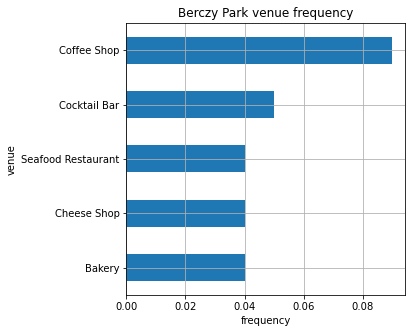

In [164]:
df_berczypark.set_index('venue')['freq'].sort_values().plot(kind='barh', grid=True, figsize=(5,5))
plt.xlabel('frequency')
plt.title('Berczy Park venue frequency')
plt.show()

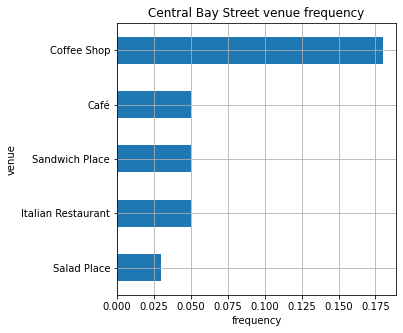

In [165]:
df_cbay.set_index('venue')['freq'].sort_values().plot(kind='barh', grid=True, figsize=(5,5))
plt.xlabel('frequency')
plt.title('Central Bay Street venue frequency')
plt.show()

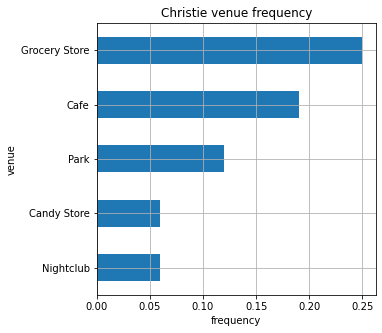

In [166]:
df_christie.set_index('venue')['freq'].sort_values().plot(kind='barh', grid=True, figsize=(5,5))
plt.xlabel('frequency')
plt.title('Christie venue frequency')
plt.show()

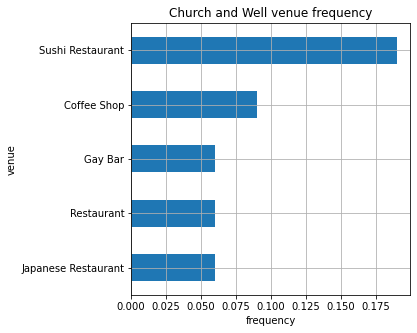

In [167]:
df_churchwell.set_index('venue')['freq'].sort_values().plot(kind='barh', grid=True, figsize=(5,5))
plt.xlabel('frequency')
plt.title('Church and Well venue frequency')
plt.show()

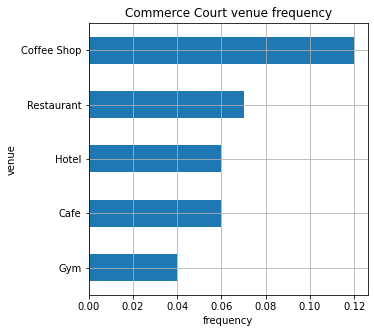

In [168]:
df_commerce.set_index('venue')['freq'].sort_values().plot(kind='barh', grid=True, figsize=(5,5))
plt.xlabel('frequency')
plt.title('Commerce Court venue frequency')
plt.show()

**Clustering neighborhoods, preparing a dataframe for venues**

In [169]:
# let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues): 
   row_categories = row.iloc[1:] 
   row_categories_sorted = row_categories.sort_values(ascending=False) 
    
   return row_categories_sorted.index.values[0:num_top_venues]

In [170]:
num_top_venues = 10 
indicators = ['st', 'nd', 'rd'] 

# create columns according to number of top venues 
columns = ['Neighbourhood'] 
for ind in np.arange(num_top_venues): 
   try: 
       columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind])) 
   except: 
       columns.append('{}th Most Common Venue'.format(ind+1)) 
        
# create a new dataframe 
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns) 
neighbourhoods_venues_sorted['Neighbourhood'] = DowntownToronto_grouped['Neighbourhood'] 
for ind in np.arange(DowntownToronto_grouped.shape[0]): 
   neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(DowntownToronto_grouped.iloc[ind, :], num_top_venues) 
neighbourhoods_venues_sorted.head() 

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Bakery,Beer Bar,Cheese Shop,Farmers Market,Restaurant,Juice Bar,Beach
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Boutique,Boat or Ferry,Plane,Rental Car Location,Coffee Shop,Sculpture Garden,Harbor / Marina
2,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Bubble Tea Shop,Salad Place,Burger Joint,Poke Place,Portuguese Restaurant,Comic Shop
3,Christie,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Nightclub,Candy Store,Restaurant,Baby Store,Coffee Shop
4,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar,Yoga Studio,Men's Store,Mediterranean Restaurant,Hotel,Pub


**Cluster Neighborhoods**

Run k-means to cluster the neighborhood into 5 clusters

In [171]:
# set number of clusters 
kclusters = 5 
DowntownToronto_grouped_clustering = DowntownToronto_grouped.drop('Neighbourhood', 1) 
# run k-means clustering 
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(DowntownToronto_grouped_clustering) 
# check cluster labels generated for each row in the dataframe 
kmeans.labels_[0:10]

array([0, 3, 4, 2, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [172]:
# add clustering labels 
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) 
DowntownToronto_merged = DowntownToronto_data 
# merge Downtown Toronto_grouped with Downtown Toronto_data to add latitude/longitude for each neighborhood 
DowntownToronto_merged = DowntownToronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood') 
DowntownToronto_merged.head() # check the last columns! 

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,Coffee Shop,Bakery,Pub,Park,Restaurant,Breakfast Spot,Café,Theater,Yoga Studio,Cosmetics Shop
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4,Coffee Shop,Sushi Restaurant,Yoga Studio,Diner,Smoothie Shop,Italian Restaurant,Japanese Restaurant,Beer Bar,Sandwich Place,Distribution Center
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Cosmetics Shop,Bubble Tea Shop,Café,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,Ramen Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Café,Coffee Shop,Cocktail Bar,American Restaurant,Gastropub,Bakery,Gym,Italian Restaurant,Hotel,Department Store
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Bakery,Beer Bar,Cheese Shop,Farmers Market,Restaurant,Juice Bar,Beach


Finally, let's visualize the resulting clusters

In [173]:
# create map 
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11) 

# set color scheme for the clusters 
x = np.arange(kclusters) 
ys = [i + x + (i*x)**2 for i in range(kclusters)] 
colors_array = cm.rainbow(np.linspace(0, 1, len(ys))) 
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map 
markers_colors = [] 
for lat, lon, poi, cluster in zip(DowntownToronto_merged['Latitude'], DowntownToronto_merged['Longitude'], DowntownToronto_merged['Neighbourhood'], DowntownToronto_merged['Cluster Labels']): 
   label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True) 
   folium.CircleMarker( 
       [lat, lon], 
       radius=5, 
       popup=label, 
       color=rainbow[cluster-1], 
       fill=True, 
       fill_color=rainbow[cluster-1], 
       fill_opacity=0.7).add_to(map_clusters) 
       
map_clusters 

**Examine Clusters**

**Cluster 1**

In [174]:
DowntownToronto_merged.loc[DowntownToronto_merged['Cluster Labels'] == 0, DowntownToronto_merged.columns[[2] + list(range(5, DowntownToronto_merged.shape[1]))]] 

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Garden District, Ryerson",0,Clothing Store,Coffee Shop,Cosmetics Shop,Bubble Tea Shop,Café,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,Ramen Restaurant
3,St. James Town,0,Café,Coffee Shop,Cocktail Bar,American Restaurant,Gastropub,Bakery,Gym,Italian Restaurant,Hotel,Department Store
4,Berczy Park,0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Bakery,Beer Bar,Cheese Shop,Farmers Market,Restaurant,Juice Bar,Beach
7,"Richmond, Adelaide, King",0,Coffee Shop,Café,Restaurant,Gym,Deli / Bodega,Thai Restaurant,Clothing Store,Pizza Place,Sushi Restaurant,Bakery
8,"Harbourfront East, Union Station, Toronto Islands",0,Coffee Shop,Aquarium,Hotel,Café,Brewery,Restaurant,Italian Restaurant,Scenic Lookout,Fried Chicken Joint,Park
9,"Toronto Dominion Centre, Design Exchange",0,Coffee Shop,Hotel,Café,Restaurant,Salad Place,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,American Restaurant,Sporting Goods Shop
10,"Commerce Court, Victoria Hotel",0,Coffee Shop,Restaurant,Hotel,Café,American Restaurant,Italian Restaurant,Gym,Seafood Restaurant,Japanese Restaurant,Cocktail Bar
11,"University of Toronto, Harbord",0,Café,Bakery,Bookstore,Japanese Restaurant,Bar,Yoga Studio,Noodle House,College Arts Building,Comfort Food Restaurant,Dessert Shop
12,"Kensington Market, Chinatown, Grange Park",0,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Vietnamese Restaurant,Mexican Restaurant,Grocery Store,Bar,Gaming Cafe,Bakery,Caribbean Restaurant
15,Stn A PO Boxes,0,Coffee Shop,Seafood Restaurant,Hotel,Italian Restaurant,Restaurant,Beer Bar,Japanese Restaurant,Cocktail Bar,Café,Park


**Cluster 2**

In [175]:
DowntownToronto_merged.loc[DowntownToronto_merged['Cluster Labels'] == 1, DowntownToronto_merged.columns[[2] + list(range(5, DowntownToronto_merged.shape[1]))]] 

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Rosedale,1,Park,Trail,Playground,Creperie,Doner Restaurant,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop


**Cluster 3**

In [176]:
DowntownToronto_merged.loc[DowntownToronto_merged['Cluster Labels'] == 2, DowntownToronto_merged.columns[[2] + list(range(5, DowntownToronto_merged.shape[1]))]] 

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Christie,2,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Nightclub,Candy Store,Restaurant,Baby Store,Coffee Shop


**Cluster 4**

In [177]:
DowntownToronto_merged.loc[DowntownToronto_merged['Cluster Labels'] == 3, DowntownToronto_merged.columns[[2] + list(range(5, DowntownToronto_merged.shape[1]))]] 

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,"CN Tower, King and Spadina, Railway Lands, Har...",3,Airport Service,Airport Lounge,Airport Terminal,Boutique,Boat or Ferry,Plane,Rental Car Location,Coffee Shop,Sculpture Garden,Harbor / Marina


**Cluster 5**

In [178]:
DowntownToronto_merged.loc[DowntownToronto_merged['Cluster Labels'] == 4, DowntownToronto_merged.columns[[2] + list(range(5, DowntownToronto_merged.shape[1]))]] 

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Regent Park, Harbourfront",4,Coffee Shop,Bakery,Pub,Park,Restaurant,Breakfast Spot,Café,Theater,Yoga Studio,Cosmetics Shop
1,"Queen's Park, Ontario Provincial Government",4,Coffee Shop,Sushi Restaurant,Yoga Studio,Diner,Smoothie Shop,Italian Restaurant,Japanese Restaurant,Beer Bar,Sandwich Place,Distribution Center
5,Central Bay Street,4,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Bubble Tea Shop,Salad Place,Burger Joint,Poke Place,Portuguese Restaurant,Comic Shop


**The above data was meant for Toronto. Preparing similiar data for NewYork City**

**Below we shall examine the neighborhoods of New York precisely in the same manner as we explored Toronto**

In [179]:
import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [180]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [181]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [182]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [183]:
neighborhoods_data = newyork_data['features']

In [184]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

Tranform the data into a pandas dataframe

In [185]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [186]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [187]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [188]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [189]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [190]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Finding out Boroughs and their neighborhoods. Preparing dataframes

In [191]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


In [192]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471
5,Brooklyn,Brighton Beach,40.576825,-73.965094
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438
8,Brooklyn,Flatbush,40.636326,-73.958401
9,Brooklyn,Crown Heights,40.670829,-73.943291


In [193]:
bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Bronx,Woodlawn,40.898273,-73.867315
7,Bronx,Norwood,40.877224,-73.879391
8,Bronx,Williamsbridge,40.881039,-73.857446
9,Bronx,Baychester,40.866858,-73.835798


In [194]:
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_data

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138
5,Queens,Corona,40.742382,-73.856825
6,Queens,Forest Hills,40.725264,-73.844475
7,Queens,Kew Gardens,40.705179,-73.829819
8,Queens,Richmond Hill,40.697947,-73.831833
9,Queens,Flushing,40.764454,-73.831773


In [195]:
statenisland_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
statenisland_data

,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182
5,Staten Island,Grymes Hill,40.624185,-74.087248
6,Staten Island,Todt Hill,40.597069,-74.111329
7,Staten Island,South Beach,40.580247,-74.079553
8,Staten Island,Port Richmond,40.633669,-74.129434
9,Staten Island,Mariner's Harbor,40.632546,-74.150085


In [196]:
print('Manhattan dataframe has {} boroughs and {} neighbourhoods.'.format( 
       len(manhattan_data['Borough'].unique()), 
       manhattan_data.shape[0]
    )
 )

Manhattan dataframe has 1 boroughs and 40 neighbourhoods.


In [197]:
print('Brooklyn dataframe has {} boroughs and {} neighbourhoods.'.format( 
       len(brooklyn_data['Borough'].unique()), 
       brooklyn_data.shape[0]
    )
 )

Brooklyn dataframe has 1 boroughs and 70 neighbourhoods.


In [198]:
print('Bronx dataframe has {} boroughs and {} neighbourhoods.'.format( 
       len(bronx_data['Borough'].unique()), 
       bronx_data.shape[0]
    )
 )

Bronx dataframe has 1 boroughs and 52 neighbourhoods.


In [199]:
print('Queens dataframe has {} boroughs and {} neighbourhoods.'.format( 
       len(queens_data['Borough'].unique()), 
       queens_data.shape[0]
    )
 )

Queens dataframe has 1 boroughs and 81 neighbourhoods.


In [200]:
print('Staten Island dataframe has {} boroughs and {} neighbourhoods.'.format( 
       len(statenisland_data['Borough'].unique()), 
       statenisland_data.shape[0]
    )
 )

Staten Island dataframe has 1 boroughs and 63 neighbourhoods.


**We will explore Manhattan and its neighbourhood**

#### Create a map of New York with neighborhoods superimposed on top.

In [201]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [202]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [203]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [204]:
print('Manhattan dataframe has {} boroughs and {} neighbourhoods.'.format( 
       len(manhattan_data['Borough'].unique()), 
       manhattan_data.shape[0]
    )
 )

Manhattan dataframe has 1 boroughs and 40 neighbourhoods.


In [205]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [206]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

#### Define Foursquare Credentials and Version

In [207]:
CLIENT_ID = 'KW0JV4RJ1HGQL2P4RVDTXMOC4HBRFMQA3GLD0CWFMB4GTEMC' # your Foursquare ID
CLIENT_SECRET = 'QMYKCS1PKC4WAINWPUAUQ1ALE25NPKDKSQVV0Y025PEETYX2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KW0JV4RJ1HGQL2P4RVDTXMOC4HBRFMQA3GLD0CWFMB4GTEMC
CLIENT_SECRET:QMYKCS1PKC4WAINWPUAUQ1ALE25NPKDKSQVV0Y025PEETYX2


#### Let's explore the first neighborhood in our dataframe.

In [208]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [209]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

In [210]:
# type your answer here

LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=KW0JV4RJ1HGQL2P4RVDTXMOC4HBRFMQA3GLD0CWFMB4GTEMC&client_secret=QMYKCS1PKC4WAINWPUAUQ1ALE25NPKDKSQVV0Y025PEETYX2&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

In [211]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '601e62572aaae823b6bd50ee'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 23,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

In [212]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [213]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Starbucks,Coffee Shop,40.877531,-73.905582
4,Dunkin',Donut Shop,40.877136,-73.906666


In [214]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

23 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Manhattan

In [215]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called _manhattan_venues_.


In [216]:
# type your answer here
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],latitudes=manhattan_data['Latitude'],longitudes=manhattan_data['Longitude'])

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [217]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3171, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [218]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,70,70,70,70,70,70
Carnegie Hill,86,86,86,86,86,86
Central Harlem,44,44,44,44,44,44
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,39,39,39,39,39,39
East Village,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues

In [219]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 333 uniques categories.


#### Analyze Each Neighborhood

In [220]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mal

In [221]:
manhattan_onehot.shape

(3171, 334)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [222]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mal

#### Let's confirm the new size

In [223]:
manhattan_grouped.shape

(40, 334)

#### Let's print each neighborhood along with 5 venues

In [224]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print("----"+hood+"----")
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0    Coffee Shop  0.09
1          Hotel  0.07
2           Park  0.06
3  Memorial Site  0.04
4            Gym  0.04


----Carnegie Hill----
            venue  freq
0     Coffee Shop  0.09
1            Café  0.05
2     Yoga Studio  0.03
3     Pizza Place  0.03
4  Cosmetics Shop  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1                  Bar  0.05
2   Chinese Restaurant  0.05
3  American Restaurant  0.05
4   Seafood Restaurant  0.05


----Chelsea----
                 venue  freq
0          Art Gallery  0.06
1          Coffee Shop  0.06
2               Bakery  0.05
3    French Restaurant  0.04
4  American Restaurant  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.08
1               Bakery  0.07
2  American Restaurant  0.04
3    Hotpot Restaurant  0.04
4         Cocktail Bar  0.04


----Civic Center----
                  venue  freq
0           Coffee Shop  0.07


**Creating dataframe for 5 neighbourhoods**

In [225]:

# Create dataframe for individual neighborhoods
df_batterypark = pd.DataFrame(np.array([['0', 'Coffee Shop', 0.09],['1', 'Hotel', 0.07],['2', 'Park', 0.06],['3', 'Memorial Site', 0.04],
                ['4', 'Gym', 0.04]]),columns=['Battery Park City', 'venue', 'freq'])
df_batterypark


,Battery Park City,venue,freq
0,0,Coffee Shop,0.09
1,1,Hotel,0.07
2,2,Park,0.06
3,3,Memorial Site,0.04
4,4,Gym,0.04


In [226]:

df_carnegiehill = pd.DataFrame(np.array([['0', 'Coffee Shop', 0.09],['1', 'Café', 0.05],['2', 'Yoga Studio', 0.03],['3', 'Pizza Place', 0.03],
                ['4', 'Cosmetics Shop', 0.03]]),columns=['Carnegie Hill', 'venue', 'freq'])
df_carnegiehill


,Carnegie Hill,venue,freq
0,0,Coffee Shop,0.09
1,1,Café,0.05
2,2,Yoga Studio,0.03
3,3,Pizza Place,0.03
4,4,Cosmetics Shop,0.03


In [227]:
df_central_harlem = pd.DataFrame(np.array([['0', 'African Restaurant', 0.07],['1', 'Bar', 0.05],['2', 'Chinese Restaurant', 0.05],['3', 'American Restaurant', 0.05],
                ['4', 'Seafood Restaurant', 0.05]]),columns=['Central Harlem', 'venue', 'freq'])
df_central_harlem


,Central Harlem,venue,freq
0,0,African Restaurant,0.07
1,1,Bar,0.05
2,2,Chinese Restaurant,0.05
3,3,American Restaurant,0.05
4,4,Seafood Restaurant,0.05


In [228]:

df_chelsea = pd.DataFrame(np.array([['0', 'Art Gallery', 0.06],['1', 'Coffee Shop', 0.06],['2', 'Bakery', 0.05],['3', 'French Restaurant', 0.04],
                ['4', 'American Restaurant', 0.03]]),columns=['Chelsea', 'venue', 'freq'])
df_chelsea



,Chelsea,venue,freq
0,0,Art Gallery,0.06
1,1,Coffee Shop,0.06
2,2,Bakery,0.05
3,3,French Restaurant,0.04
4,4,American Restaurant,0.03


In [229]:
df_chinatown = pd.DataFrame(np.array([['0', 'Chinese Restaurant', 0.08],['1', 'Bakery', 0.07],['2', 'Bakery', 0.04],['3', 'Hotpot Restaurant', 0.04],
                ['4', 'Cocktail Bar', 0.04]]),columns=['Chinatown', 'venue', 'freq'])
df_chinatown

,Chinatown,venue,freq
0,0,Chinese Restaurant,0.08
1,1,Bakery,0.07
2,2,Bakery,0.04
3,3,Hotpot Restaurant,0.04
4,4,Cocktail Bar,0.04


In [230]:
df_batterypark['freq'] = df_batterypark['freq'].astype(float)

print (df_batterypark)
print (df_batterypark.dtypes)

df_carnegiehill['freq'] = df_carnegiehill['freq'].astype(float)
print (df_carnegiehill)
print (df_carnegiehill.dtypes)

df_central_harlem['freq'] = df_central_harlem['freq'].astype(float)
print (df_central_harlem)
print (df_central_harlem.dtypes)

df_chelsea['freq'] = df_chelsea['freq'].astype(float)
print (df_chelsea)
print (df_chelsea.dtypes)

df_chinatown['freq'] = df_chinatown['freq'].astype(float)
print (df_chinatown)
print (df_chinatown.dtypes)

  Battery Park City          venue  freq
0                 0    Coffee Shop  0.09
1                 1          Hotel  0.07
2                 2           Park  0.06
3                 3  Memorial Site  0.04
4                 4            Gym  0.04
Battery Park City     object
venue                 object
freq                 float64
dtype: object
  Carnegie Hill           venue  freq
0             0     Coffee Shop  0.09
1             1            Café  0.05
2             2     Yoga Studio  0.03
3             3     Pizza Place  0.03
4             4  Cosmetics Shop  0.03
Carnegie Hill     object
venue             object
freq             float64
dtype: object
  Central Harlem                venue  freq
0              0   African Restaurant  0.07
1              1                  Bar  0.05
2              2   Chinese Restaurant  0.05
3              3  American Restaurant  0.05
4              4   Seafood Restaurant  0.05
Central Harlem     object
venue              object
freq              fl

In [231]:
df_batterypark.dtypes


Battery Park City     object
venue                 object
freq                 float64
dtype: object

In [232]:
df_batterypark

,Battery Park City,venue,freq
0,0,Coffee Shop,0.09
1,1,Hotel,0.07
2,2,Park,0.06
3,3,Memorial Site,0.04
4,4,Gym,0.04


In [233]:

# Create dataframe for individual neighborhoods
df_batterypark1 = pd.DataFrame(np.array([[ 'Coffee Shop', 0.09],[ 'Hotel', 0.07],[ 'Park', 0.06],[ 'Memorial Site', 0.04],
                [ 'Gym', 0.04]]),columns=['venue', 'freq'])
df_batterypark1

,venue,freq
0,Coffee Shop,0.09
1,Hotel,0.07
2,Park,0.06
3,Memorial Site,0.04
4,Gym,0.04


**Using the above information prepare bar graph for 5 neighborhoods**

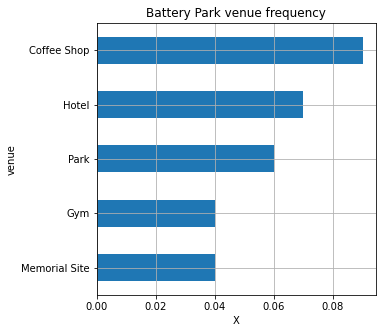

In [234]:
df_batterypark.set_index('venue')['freq'].sort_values().plot(kind='barh', grid=True, figsize=(5,5))
plt.xlabel('X')
plt.title('Battery Park venue frequency')
plt.show()


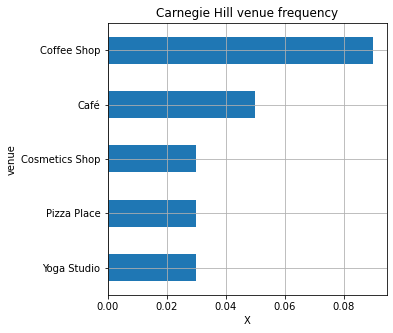

In [235]:
df_carnegiehill.set_index('venue')['freq'].sort_values().plot(kind='barh', grid=True, figsize=(5,5))
plt.xlabel('X')
plt.title('Carnegie Hill venue frequency')
plt.show()



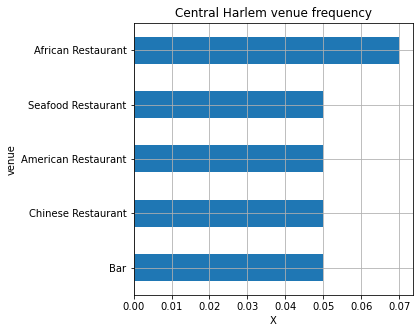

In [236]:
df_central_harlem.set_index('venue')['freq'].sort_values().plot(kind='barh', grid=True, figsize=(5,5))
plt.xlabel('X')
plt.title('Central Harlem venue frequency')
plt.show()


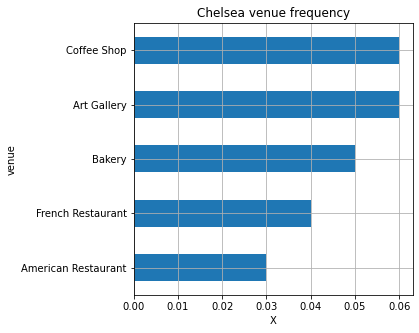

In [237]:
df_chelsea.set_index('venue')['freq'].sort_values().plot(kind='barh', grid=True, figsize=(5,5))
plt.xlabel('X')
plt.title('Chelsea venue frequency')
plt.show()

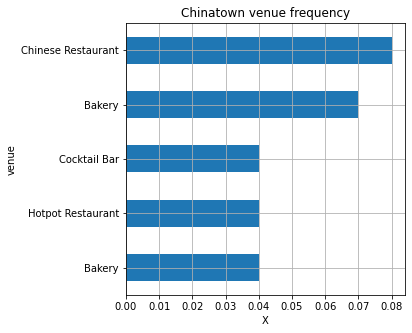

In [238]:
df_chinatown.set_index('venue')['freq'].sort_values().plot(kind='barh', grid=True, figsize=(5,5))
plt.xlabel('X')
plt.title('Chinatown venue frequency')
plt.show()

#### Clustering neighborhoods, preparing a dataframe for venues

Writing a function to sort the venues in descending order.

In [239]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [240]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Coffee Shop,Hotel,Park,Clothing Store,Gym,Memorial Site,Food Court,Shopping Mall,Beer Garden,Plaza
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Pizza Place,Wine Shop,Cosmetics Shop,Bookstore,Gym,Bar,Japanese Restaurant
2,Central Harlem,African Restaurant,Chinese Restaurant,French Restaurant,Gym / Fitness Center,American Restaurant,Bar,Cosmetics Shop,Seafood Restaurant,Gym,Grocery Store
3,Chelsea,Coffee Shop,Art Gallery,Bakery,French Restaurant,Ice Cream Shop,Wine Shop,Seafood Restaurant,American Restaurant,Italian Restaurant,Cupcake Shop
4,Chinatown,Chinese Restaurant,Bakery,American Restaurant,Hotpot Restaurant,Cocktail Bar,Salon / Barbershop,Dessert Shop,Spa,Optical Shop,Ice Cream Shop


##  Cluster Neighborhoods

Run _k_-means to cluster the neighborhood into 5 clusters.

In [241]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 0, 2, 0, 2, 2, 3, 0, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [242]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Discount Store,Sandwich Place,Coffee Shop,Gym,Tennis Stadium,Steakhouse,Donut Shop,Kids Store,Seafood Restaurant,Pharmacy
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Bakery,American Restaurant,Hotpot Restaurant,Cocktail Bar,Salon / Barbershop,Dessert Shop,Spa,Optical Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Bakery,Spanish Restaurant,Grocery Store,Mobile Phone Shop,Deli / Bodega,Sandwich Place,Latin American Restaurant,Gym,Tapas Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Café,Mexican Restaurant,Lounge,Restaurant,Chinese Restaurant,Deli / Bodega,Wine Bar,Pizza Place,Bakery,Caribbean Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Pizza Place,Café,Coffee Shop,Mexican Restaurant,Deli / Bodega,Latin American Restaurant,Liquor Store,Sushi Restaurant,Cocktail Bar,Sandwich Place


In [243]:
manhattan_merged.groupby('Neighborhood').count()

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,
Battery Park City,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Carnegie Hill,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Central Harlem,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Chelsea,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Chinatown,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Civic Center,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Clinton,1,1,1,1,1,1,1,1,1,1,1,1,1,1
East Harlem,1,1,1,1,1,1,1,1,1,1,1,1,1,1
East Village,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Finally, let's visualize the resulting clusters

In [244]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

Examining each cluster and determining the discriminating venue categories that distinguish each cluster.

**Cluster 1**

In [245]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Bakery,American Restaurant,Hotpot Restaurant,Cocktail Bar,Salon / Barbershop,Dessert Shop,Spa,Optical Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Chinese Restaurant,French Restaurant,Gym / Fitness Center,American Restaurant,Bar,Cosmetics Shop,Seafood Restaurant,Gym,Grocery Store
12,Upper West Side,Bakery,Café,Bar,Wine Bar,Italian Restaurant,Indian Restaurant,Pizza Place,Seafood Restaurant,Bagel Shop,Gym / Fitness Center
19,East Village,Bar,Pizza Place,Wine Bar,Mexican Restaurant,Korean Restaurant,Vietnamese Restaurant,Salon / Barbershop,Coffee Shop,Dessert Shop,Ice Cream Shop
20,Lower East Side,Chinese Restaurant,Art Gallery,Latin American Restaurant,Bakery,Café,Coffee Shop,Japanese Restaurant,Clothing Store,Mediterranean Restaurant,Bubble Tea Shop
22,Little Italy,Bakery,Chinese Restaurant,Cocktail Bar,Café,Italian Restaurant,Hotel,Sandwich Place,Mediterranean Restaurant,Bubble Tea Shop,Salon / Barbershop
27,Gramercy,Bagel Shop,Bar,Pizza Place,Italian Restaurant,American Restaurant,Cocktail Bar,Mexican Restaurant,Playground,Grocery Store,Ice Cream Shop


**Cluster 2**

In [246]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Midtown South,Korean Restaurant,Hotel,Hotel Bar,Gym / Fitness Center,Burger Joint,Coffee Shop,Café,Bakery,Japanese Restaurant,Salad Place


**Cluster 3**

In [247]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Discount Store,Sandwich Place,Coffee Shop,Gym,Tennis Stadium,Steakhouse,Donut Shop,Kids Store,Seafood Restaurant,Pharmacy
8,Upper East Side,Italian Restaurant,Exhibit,Coffee Shop,Bakery,Gym / Fitness Center,American Restaurant,Yoga Studio,Hotel,Juice Bar,Spa
9,Yorkville,Italian Restaurant,Coffee Shop,Bar,Gym,Deli / Bodega,Sushi Restaurant,Japanese Restaurant,Wine Shop,Diner,Park
10,Lenox Hill,Italian Restaurant,Sushi Restaurant,Cocktail Bar,Coffee Shop,Café,Pizza Place,Gym,Gym / Fitness Center,Burger Joint,Sporting Goods Shop
13,Lincoln Square,Plaza,Gym / Fitness Center,Café,Performing Arts Venue,Theater,Italian Restaurant,Concert Hall,Indie Movie Theater,Wine Shop,Coffee Shop
14,Clinton,Italian Restaurant,Theater,Gym / Fitness Center,Coffee Shop,Wine Shop,Gym,American Restaurant,Cocktail Bar,Hotel,Sandwich Place
15,Midtown,Hotel,Coffee Shop,Clothing Store,Theater,Bookstore,Steakhouse,Bakery,Gym,Sporting Goods Shop,Spa
16,Murray Hill,Coffee Shop,Sandwich Place,Bar,American Restaurant,Hotel,Gym / Fitness Center,Japanese Restaurant,Burger Joint,Gym,Juice Bar
17,Chelsea,Coffee Shop,Art Gallery,Bakery,French Restaurant,Ice Cream Shop,Wine Shop,Seafood Restaurant,American Restaurant,Italian Restaurant,Cupcake Shop
18,Greenwich Village,Italian Restaurant,Clothing Store,Sushi Restaurant,Coffee Shop,Café,Gym,Dessert Shop,Indian Restaurant,American Restaurant,Vietnamese Restaurant


**Cluster 4**

In [248]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Spanish Restaurant,Grocery Store,Mobile Phone Shop,Deli / Bodega,Sandwich Place,Latin American Restaurant,Gym,Tapas Restaurant
3,Inwood,Café,Mexican Restaurant,Lounge,Restaurant,Chinese Restaurant,Deli / Bodega,Wine Bar,Pizza Place,Bakery,Caribbean Restaurant
4,Hamilton Heights,Pizza Place,Café,Coffee Shop,Mexican Restaurant,Deli / Bodega,Latin American Restaurant,Liquor Store,Sushi Restaurant,Cocktail Bar,Sandwich Place
5,Manhattanville,Coffee Shop,Sushi Restaurant,Seafood Restaurant,Mexican Restaurant,Deli / Bodega,Italian Restaurant,Latin American Restaurant,History Museum,Supermarket,Boutique
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Latin American Restaurant,Sandwich Place,New American Restaurant,Spa,Pizza Place,French Restaurant
11,Roosevelt Island,Park,Gym,Dog Run,Plaza,Soccer Field,Farmers Market,Supermarket,Metro Station,Outdoors & Recreation,School
36,Tudor City,Park,Café,Mexican Restaurant,Deli / Bodega,Greek Restaurant,Coffee Shop,Sushi Restaurant,Dog Run,Pizza Place,Vietnamese Restaurant


**Cluster 5**

In [249]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Park,Bar,Boat or Ferry,Coffee Shop,Cocktail Bar,Heliport,Gym / Fitness Center,Farmers Market,Pet Service,Harbor / Marina
